In [274]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [275]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np


#This code is used to identify the pixel coordinates on the image

In [277]:
image_points = []
fig = plt.figure(figsize=(20,30))

img = mpimg.imread('../images/Section-3/cube-01.jpg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    image_points.append([ix, iy])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

These are the world points taken

In [390]:
world=[[0,0,0],[0,0,28],[0,-28,56],[0,-84,56],[0,-112,84],[0,-168,84],[0,-196,112],[0,-252,112],[0,-252,168],[0,-224,196],
      [28,0,0],[56,-28,0],[56,-84,0],[84,-112,0],[84,-168,0],[112,-196,0],[112,-252,0],[168,-252,0],[196,-224,0],[0,-252,0]]

This code is to get all the world points required for the wire frame

In [391]:
def mult(temp):
    allp=np.empty((0,3))
    for i in range(0,10):
        m=[[1,0,0],[0,i,0],[0,0,1]]
        ans=temp@m
        allp= np.concatenate((allp, ans))
    return allp
temp=np.array([[0,-28,28*7],[0,-28,28*6],[0,-28,28*5],[0,-28,28*4],[0,-28,28*3],[0,-28,28*2],[0,-28,28*1],[0,-28,0],[28,-28,0],[28*2,-28,0],[28*3,-28,0],[28*4,-28,0],[28*5,-28,0],[28*6,-28,0],[28*7,-28,0]])
allp=mult(temp).astype(int)
# print(allp)

In [ ]:
print(image_points)

In [392]:
image_points=[[1547.99035974 ,1603.19503187],
 [1414.86680978 ,1608.74184645],
 [1281.74325982 ,1808.42717139],
 [1287.2900744 , 2152.32967546],
 [1154.16652444 ,2363.10862956],
 [1159.71333902 ,2695.91750447],
 [1021.04297448 ,2917.79008774],
 [1037.68341822 ,3239.50533348],
 [ 721.51498707 ,3383.7225126 ],
 [ 544.01692045 ,3311.61392304],
 [1658.92665138 ,1619.83547561],
 [1797.59701592 ,1808.42717139],
 [1792.05020134 ,2163.42330462],
 [1925.1737513  ,2374.20225873],
 [1914.08012214 ,2707.01113363],
 [2052.75048668 ,2934.43053148],
 [2041.65685752 ,3261.6925918 ],
 [2341.18484493 ,3417.00340009],
 [2513.13609696 ,3328.25436678],
 [1547.99035974 ,3000.99230646]]

# TASK-1

get_projection function gives the estimated P

In [393]:
# N2=len(world)
# print(image_points)
def get_projection(world,image_points):
    N2=len(world)
    M=[]
    for i in range(N2):
        Xi=world[i][0]
        Yi=world[i][1]
        Zi=world[i][2]
        xi=image_points[i][0]
        yi=image_points[i][1]
#         print(xi,yi)
        axi=[-Xi, -Yi, -Zi, -1, 0, 0, 0, 0, xi*Xi, xi*Yi, xi*Zi, xi]
        ayi=[0, 0, 0, 0, -Xi, -Yi, -Zi, -1, yi*Xi, yi*Yi, yi*Zi, yi]
        M.append(axi)
        M.append(ayi)
    M=np.array(M)
    U,S,V=np.linalg.svd(M)
    V=V.T
    v=V[:,-1]/V[-1,-1]
    P = v.reshape(3,4)
    return P


get_reprojected points gives the reprojected points from the estimated projection matrix<br/>
get_reprojection error gives the reprojection error

In [394]:
def get_reprojected_points(P, X_world):
    x=P@(X_world.T)
    x=x/x[2]
    print("Reprojected points")
    print(x.T)
    return x.T

def get_reprojected_points2(P, X_world):
    x=P@(X_world.T)
    x=x/x[2]
    return x.T

def visualise(P, X_world, img_path):
    N=len(X_world)
    fig = plt.figure(figsize=(10,15))

    img=mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    image=get_reprojected_points(P, X_world)
    colors = np.random.rand(N)
    area = (15 * np.ones(N))**2 
    
    plt.scatter(image[:,0], image[:,1], c=colors, s=area)
    plt.show()
    
    
def get_reprojection_err(P, X_world, image):
#     print("Reprojection error: ")
    rep_points=get_reprojected_points(P, X_world)
    error=np.mean(np.sqrt(np.sum((rep_points-image)**2,axis=0)))
    print("Reprojection error: ")
    print(error)
    return error,rep_points

def get_reprojection_err2(P, X_world, image):
#     print("Reprojection error: ")
    rep_points=get_reprojected_points2(P, X_world)
    error=np.mean(np.sqrt(np.sum((rep_points-image)**2,axis=0)))
    return error
    


Decomposing K,R,T in two methods

In [395]:
def get_RKT2(P):
    h=P[:,3]
    H=P[0:3,0:3]
    Rzp=[[-1,0,0],[0,-1,0],[0,0,1]]
    Hi=np.linalg.inv(H)
    XO=-1*(Hi@h)  
    Te = H@(H.T)  
    cx = Te[0][2]
    cy = Te[1][2]
    fy = np.sqrt(Te[1][1] - (cy**2))
    s = (Te[0][1] - cx * cy) / fy
    fx = np.sqrt(Te[0][0] - (s**2) - (cx**2))
    K = np.array([[fx, s, cx], [0, fy, cy], [0, 0, 1]])
    R = np.linalg.inv(K)@H
    T=np.linalg.inv(K)@h
    print(f' R = {R}\n')
    print(f' K = {K}\n')
    print(f' XO = {XO}\n')
    t3=T.reshape(3,1)
    temp2=np.concatenate([R, t3], axis=1)
    P_ver = K@temp2 
    print(np.isclose(P, P_ver))
    return R,K,T

def get_RKT(P):
    h=P[:,3]
    H=P[0:3,0:3]
#     Rzp=[[-1,0,0],[0,-1,0],[0,0,1]]
    Hi=np.linalg.inv(H)
    XO=-1*(Hi@h)  
    R_in,K_in=np.linalg.qr(Hi)
    R=R_in.T
    K=np.linalg.inv(K_in)
    T =  -R@XO
    print(f' R = {R}\n')
    print(f' K = {K}\n')
    print(f' XO = {XO}\n')
    t3=T.reshape(3,1)
    temp2=np.concatenate([R, t3], axis=1)
    P_ver = K@temp2 
    print(np.isclose(P, P_ver))
    return R,K,T

def get_RKT3(P):
    h=P[:,3]
    H=P[0:3,0:3]
    Rzp=[[-1,0,0],[0,-1,0],[0,0,1]]
    Hi=np.linalg.inv(H)
    XO=-1*(Hi@h)  
    R_in,K_in=np.linalg.qr(Hi)
    R=R_in.T
    K=np.linalg.inv(K_in)
    K=K@Rzp
    R=Rzp@R
    T =  -R@XO
    print(f' R = {R}\n')
    print(f' K = {K/K[2,2]}\n')
    print(f' XO = {XO}\n')
    t3=T.reshape(3,1)
    temp2=np.concatenate([R, t3], axis=1)
    P_ver = K@temp2 
    print(np.isclose(P, P_ver))
    return R,K,T




In [396]:
def plot_wireframe(projections, image="../images/Section-1/calib-object.jpg"):
  
    # Plotting image points on the image
    plt.scatter(projections[:, 0], projections[:, 1], color='r', s=13, lw=1)

    # This is plotting vertical lines
    # We are finding two points across which we want to join a line. For this we are finding the nth and n+6th point for every line
    for (u, v) in zip(range(0, 150, 1), range(1, 150, 1)):
        if(v%15):
#             print("Yes")
            plt.plot([projections[u, 0], projections[v, 0]], [projections[u, 1], projections[v, 1]], color='r')
    for t in range(0,15):
        for (u, v) in zip(range(t, 150, 15), range(t+15, 150, 15)):
            plt.plot([projections[u, 0], projections[v, 0]], [projections[u, 1], projections[v, 1]], color='r')
    # Here the points are plotting horizontal lines
#     for (u, v) in zip(range(6), range(42, 48)):
#         plt.plot([projections[u, 0], projections[v, 0]], [projections[u, 1], projections[v, 1]], color='r')
    
    im=plt.imread("../images/Section-1/calib-object.jpg")
    plt.imshow(im)

# Experiment_1

Projection matrix P=[[ 2.45213256e+00 -5.85306170e-01 -6.18453393e+00  1.54339528e+03]
 [-1.21373462e+00 -6.65136027e+00 -1.32229015e+00  1.59806023e+03]
 [-1.15109251e-03 -3.65029772e-04 -1.14424882e-03  1.00000000e+00]]

 R = [[-0.70283558 -0.01313984  0.71123097]
 [ 0.16509718 -0.97554166  0.14512544]
 [ 0.69192852  0.21942156  0.68781473]]

 K = [[-6.11438726e+00  7.82975111e-02 -2.68554191e+00]
 [ 0.00000000e+00  6.09639691e+00 -3.20876005e+00]
 [-0.00000000e+00 -0.00000000e+00 -1.66360033e-03]]

 XO = [432.54075547  79.11331228 413.56989393]

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
Reprojected points
[[1.54339528e+03 1.59806023e+03 1.00000000e+00]
 [1.41558212e+03 1.61270552e+03 1.00000000e+00]
 [1.28252292e+03 1.80760228e+03 1.00000000e+00]
 [1.28930995e+03 2.15472739e+03 1.00000000e+00]
 [1.15314080e+03 2.36242538e+03 1.00000000e+00]
 [1.16267763e+03 2.69829519e+03 1.00000000e+00]
 [1.02338113e+03 2.91886753e+03 1.00000000e+00]
 [1.0356

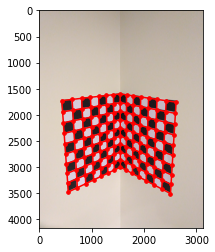

In [397]:
%matplotlib inline
temp=np.ones((len(world),1))
X_world = np.concatenate([world, temp], axis=1)
image = np.concatenate([image_points, temp], axis=1)
P=get_projection(X_world,image)
print(f'Projection matrix P={P}\n')
get_RKT(P)
err,_=get_reprojection_err(P, X_world, image)
temp2=np.ones((len(allp),1))
X_world2 = np.concatenate([allp, temp2], axis=1)
projections=get_reprojected_points2(P, X_world2)
# visualise(P,X_world2,"../images/Section-1/calib-object.jpg")
plot_wireframe(projections)
# err1=get_reprojection_err2(P, X_world[inliers,:], image[inliers,:])
# print(err1)

# Experiment-2

Projection matrix P=[[ 2.45213281e-02 -5.85305884e-03 -6.18453355e-02  1.54339528e+03]
 [-1.21373401e-02 -6.65135970e-02 -1.32228938e-02  1.59806022e+03]
 [-1.15109231e-05 -3.65029583e-06 -1.14424857e-05  1.00000000e+00]]

 R = [[-0.70283556 -0.01313983  0.71123099]
 [ 0.16509713 -0.97554167  0.1451254 ]
 [ 0.69192854  0.21942149  0.68781473]]

 K = [[-6.11438721e-02  7.82974706e-04 -2.68554128e-02]
 [ 0.00000000e+00  6.09639679e-02 -3.20875856e-02]
 [-0.00000000e+00 -0.00000000e+00 -1.66359998e-05]]

 XO = [43254.08394601  7911.33755605 41356.99682815]

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
Reprojected points
[[1.54339528e+03 1.59806022e+03 1.00000000e+00]
 [1.41558212e+03 1.61270553e+03 1.00000000e+00]
 [1.28252292e+03 1.80760229e+03 1.00000000e+00]
 [1.28930995e+03 2.15472739e+03 1.00000000e+00]
 [1.15314080e+03 2.36242538e+03 1.00000000e+00]
 [1.16267763e+03 2.69829519e+03 1.00000000e+00]
 [1.02338113e+03 2.91886753e+03 1.00000000e+00]
 [

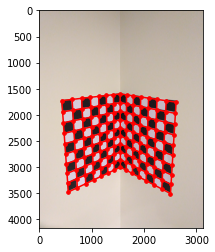

In [398]:
#Experiment-2
a=np.array([[100,0,0],[0,100,0],[0,0,100]])
world2=world@a
# print(world2)
temp=np.ones((len(world2),1))
X_world = np.concatenate([world2, temp], axis=1)
image = np.concatenate([image_points, temp], axis=1)
P=get_projection(X_world,image)
print(f'Projection matrix P={P}\n')
get_RKT(P)
err,_=get_reprojection_err(P, X_world, image)
temp2=np.ones((len(allp),1))
allp2=allp@a
X_world2 = np.concatenate([allp2, temp2], axis=1)
# print(X_world2.shape)
projections2=get_reprojected_points2(P, X_world2)
# print(projections2.shape)
# visualise(P,X_world2,"../images/Section-1/calib-object.jpg")
plot_wireframe(projections2)


# Experiment-3

Projection matrix P=[[ 2.45213266e+00 -2.92653026e-01 -6.18453379e+00  1.54339528e+03]
 [-1.21373438e+00 -3.32568002e+00 -1.32228991e+00  1.59806023e+03]
 [-1.15109243e-03 -1.82514847e-04 -1.14424874e-03  1.00000000e+00]]

 R = [[-0.70265362 -0.02627289  0.71104685]
 [ 0.09786351 -0.99338934  0.060003  ]
 [ 0.7047699   0.11174687  0.70057977]]

 K = [[-6.11280432e+00  1.59602109e-01 -2.63727305e+00]
 [ 0.00000000e+00  3.10557340e+00 -2.15340735e+00]
 [-0.00000000e+00 -0.00000000e+00 -1.63328829e-03]]

 XO = [432.54078483 158.22666874 413.56992172]

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
Reprojected points
[[1.54339528e+03 1.59806023e+03 1.00000000e+00]
 [1.41558212e+03 1.61270552e+03 1.00000000e+00]
 [1.28252292e+03 1.80760229e+03 1.00000000e+00]
 [1.28930995e+03 2.15472739e+03 1.00000000e+00]
 [1.15314080e+03 2.36242538e+03 1.00000000e+00]
 [1.16267763e+03 2.69829519e+03 1.00000000e+00]
 [1.02338113e+03 2.91886753e+03 1.00000000e+00]
 [1.0356

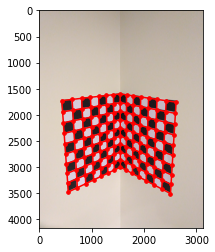

In [399]:
#Experiment-3
a=np.array([[1,0,0],[0,2,0],[0,0,1]])
world2=world@a
# print(world2)
temp=np.ones((len(world2),1))
X_world = np.concatenate([world2, temp], axis=1)
image = np.concatenate([image_points, temp], axis=1)
P=get_projection(X_world,image)
print(f'Projection matrix P={P}\n')
get_RKT(P)
err,_=get_reprojection_err(P, X_world, image)
temp2=np.ones((len(allp),1))
allp2=allp@a
X_world2 = np.concatenate([allp2, temp2], axis=1)
# print(X_world2.shape)
projections=get_reprojected_points2(P, X_world2)
plot_wireframe(projections)

# Experiment-4

[[   0    0    0]
 [   0  -28   56]
 [   0 -112   84]
 [   0 -196  112]
 [   0 -252  168]
 [  28    0    0]
 [  56  -84    0]
 [  84 -168    0]
 [ 112 -252    0]
 [ 196 -224    0]]
Projection matrix P=[[ 2.23081371e+00 -6.03427287e-01 -6.24491088e+00  1.54571985e+03]
 [-1.42761644e+00 -6.61264864e+00 -1.34850182e+00  1.60423727e+03]
 [-1.20185560e-03 -3.50748893e-04 -1.12517205e-03  1.00000000e+00]]

 R = [[-0.68321403 -0.0014111   0.73021682]
 [ 0.1530985  -0.97804906  0.14135379]
 [ 0.7139884   0.20836999  0.66843287]]

 K = [[-6.08341066e+00  4.89738963e-02 -2.70726474e+00]
 [ 0.00000000e+00  6.05831298e+00 -3.29856207e+00]
 [-0.00000000e+00 -0.00000000e+00 -1.68329849e-03]]

 XO = [439.84684546  66.43394569 398.21996188]

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
Reprojected points
[[1.54571985e+03 1.60423727e+03 1.00000000e+00]
 [1.28103748e+03 1.81015507e+03 1.00000000e+00]
 [1.15237768e+03 2.36203640e+03 1.00000000e+00]
 [1.02316053e+03 2.

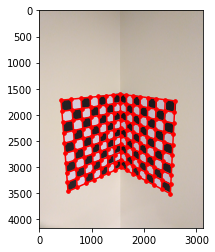

In [400]:
#Experiment-4
a=np.array([0,2,4,6,8,10,12,14,16,18])
world=np.array(world)
image_points=np.array(image_points)
world2=world[a,:]
print(world2)
temp=np.ones((len(world2),1))
X_world = np.concatenate([world2, temp], axis=1)
image = np.concatenate([image_points[a,:], temp], axis=1)
P=get_projection(X_world,image)
print(f'Projection matrix P={P}\n')
get_RKT(P)
err,_=get_reprojection_err(P, X_world, image)
# plot_wireframe(projections)
temp2=np.ones((len(allp),1))
# allp2=allp@a
X_world2 = np.concatenate([allp, temp2], axis=1)
# print(X_world2.shape)
projections=get_reprojected_points2(P, X_world2)
plot_wireframe(projections)

# Experiment-5

[[   0    0    0]
 [   0  -28   56]
 [   0 -196  112]
 [  56  -84    0]
 [  84 -168    0]
 [ 196 -224    0]]
Projection matrix P=[[ 2.20899731e+00 -7.08706153e-01 -6.46562820e+00  1.54815446e+03]
 [-1.49162315e+00 -6.79946435e+00 -1.64389736e+00  1.60310783e+03]
 [-1.25913619e-03 -4.38593363e-04 -1.27581829e-03  1.00000000e+00]]

 R = [[-0.70910464 -0.01487507  0.70494634]
 [ 0.17782741 -0.97123243  0.1583824 ]
 [ 0.68231079  0.23766848  0.69135062]]

 K = [[-6.11378910e+00  5.70969600e-02 -3.13123047e+00]
 [ 0.00000000e+00  6.07824436e+00 -3.77027838e+00]
 [-0.00000000e+00 -0.00000000e+00 -1.84539979e-03]]

 XO = [399.36615957  58.84065261 369.43857938]

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
Reprojected points
[[1.54815446e+03 1.60310783e+03 1.00000000e+00]
 [1.28175856e+03 1.80843077e+03 1.00000000e+00]
 [1.02103534e+03 2.91778829e+03 1.00000000e+00]
 [1.79171633e+03 2.16357919e+03 1.00000000e+00]
 [1.91418718e+03 2.70697130e+03 1.00000000e

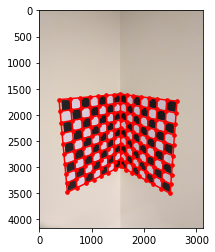

In [401]:
#Experiment-5
a=np.array([0,2,6,12,14,18])
world=np.array(world)
image_points=np.array(image_points)
world2=world[a,:]
print(world2)
temp=np.ones((len(world2),1))
X_world = np.concatenate([world2, temp], axis=1)
image = np.concatenate([image_points[a,:], temp], axis=1)
P=get_projection(X_world,image)
print(f'Projection matrix P={P}\n')
get_RKT(P)
err,_=get_reprojection_err(P, X_world, image)

projections=get_reprojected_points2(P, X_world2)
plot_wireframe(projections)

# Experiment-6

First part is without shifting the world origin

[[   0    0    0]
 [   0    0   28]
 [   0  -28   56]
 [   0  -84   56]
 [   0 -112   84]
 [   0 -168   84]]
Projection matrix P=[[inf nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]

 R = [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

 K = [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

 XO = [nan nan nan]

[[False False False False]
 [False False False False]
 [False False False False]]
Reprojected points
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Reprojection error: 
nan


/tmp/ipykernel_5646/1319110096.py:20: RuntimeWarning: divide by zero encountered in divide
  v=V[:,-1]/V[-1,-1]
/tmp/ipykernel_5646/1319110096.py:20: RuntimeWarning: invalid value encountered in divide
  v=V[:,-1]/V[-1,-1]
/tmp/ipykernel_5646/66946277.py:2: RuntimeWarning: invalid value encountered in matmul
  x=P@(X_world.T)
/tmp/ipykernel_5646/66946277.py:9: RuntimeWarning: invalid value encountered in matmul
  x=P@(X_world.T)


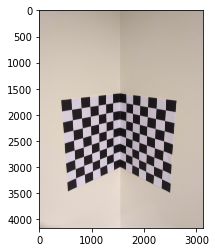

In [404]:
a=np.array([0,1,2,3,4,5])
world=np.array(world)
image_points=np.array(image_points)
world2=world[a,:]
print(world2)
temp=np.ones((len(world2),1))
X_world = np.concatenate([world2, temp], axis=1)
image = np.concatenate([image_points[a,:], temp], axis=1)
P=get_projection(X_world,image)
print(f'Projection matrix P={P}\n')
get_RKT(P)
err,_=get_reprojection_err(P, X_world, image)
bru=allp
temp2=np.ones((len(allp),1))
X_world2 = np.concatenate([bru, temp2], axis=1)
projections=get_reprojected_points2(P, X_world2)
plot_wireframe(projections)

Second part is when shifting the world origin

[[500 500 500]
 [500 500 528]
 [500 472 556]
 [500 416 556]
 [500 388 584]
 [500 332 584]]
Projection matrix P=[[-1.82949419e-04  6.30074256e-15  9.96793131e-14  9.14747092e-02]
 [ 8.11879538e-02  9.08540623e-14  3.60368958e-14 -4.05939769e+01]
 [-2.00000000e-03  9.75354188e-19  1.87415762e-17  1.00000000e+00]]

 R = [[-8.43769499e-15  3.75257612e-01 -9.26920560e-01]
 [-3.98279812e-15 -9.26920560e-01 -3.75257612e-01]
 [-1.00000000e+00  6.10622664e-16  9.32587341e-15]]

 K = [[-9.00288475e-14 -4.32449828e-14  1.82915122e-04]
 [-0.00000000e+00 -9.80598120e-14 -8.11727339e-02]
 [ 0.00000000e+00  0.00000000e+00  1.99962507e-03]]

 XO = [500.         683.5        715.66796875]

[[False  True  True False]
 [False  True  True False]
 [False  True  True False]]
Reprojected points
[[1.52282929e+03 1.61432836e+03 1.00000000e+00]
 [1.39781152e+03 1.61900000e+03 1.00000000e+00]
 [1.25298085e+03 1.78270968e+03 1.00000000e+00]
 [1.27861089e+03 2.15225806e+03 1.00000000e+00]
 [1.12498021e+03 2.339200

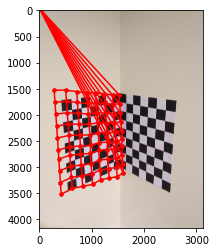

In [405]:
#Experiment-6 
a=np.array([0,1,2,3,4,5])
world=np.array(world)
image_points=np.array(image_points)
world2=world[a,:]+500
print(world2)
temp=np.ones((len(world2),1))
X_world = np.concatenate([world2, temp], axis=1)
image = np.concatenate([image_points[a,:], temp], axis=1)
P=get_projection(X_world,image)
print(f'Projection matrix P={P}\n')
get_RKT(P)
err,_=get_reprojection_err(P, X_world, image)
bru=allp+500
temp2=np.ones((len(allp),1))
X_world2 = np.concatenate([bru, temp2], axis=1)
projections=get_reprojected_points2(P, X_world2)
plot_wireframe(projections)

# RANSAC Based DLT

Three different methods

In [406]:
def get_set(P,image,world):
    threshold_err=150
    r=[]
    for i in range(0,len(image)):
        b=np.linalg.norm((P@(world[i].T))-image[i].T)
#         print(b)
        if(b<threshold_err):
            r.append(i)
    return np.array(r).astype(int)    
    

def ransac_dlt(image, world):
    n=len(image)
    arr=np.arange(0,n,1,dtype=int)  #n denotes the number of points
    MAX=1000
    i=0
    err=np.inf
    best=np.empty((3,4))
    inliers=0
    max_inliers=12
    inliers=[]
    while(i<MAX):
#         print(i)
        i=i+1
        ran=np.random.choice(arr,6,replace=False)
        inliers=np.union1d(ran,inliers).astype(int)
#         print(inliers)
        worlddlt=world[inliers,:]
        camdlt=image[inliers,:]
        g=worlddlt[:,0:3]
        tempu=np.all(g == g[0,:], axis = 0)
#         print(tempu)
        if(np.any(tempu == True)):
#             print(i)
            continue
        P=get_projection(worlddlt,camdlt)
        inliers2=get_set(P,image,world)
        inliers=np.intersect1d(inliers,inliers2)
        if(len(inliers)>=max_inliers):
            best=P
#             print("Yes")
            max_inliers=len(inliers)
    print(max_inliers)  
    return best,inliers

In [407]:
def ransac_dlt2(image, world):
    n=len(image)
    arr=np.arange(0,n,1,dtype=int)  #n denotes the number of points
    MAX=1000
    i=0
    err=np.inf
    best=np.empty((3,4))
    best_err=np.inf
    while(i<MAX):
        i=i+1
        ran=np.random.choice(arr,6,replace=False)
        worlddlt=world[ran,:]
        camdlt=image[ran,:]
        g=worlddlt[:,0:3]
        tempu=np.all(g == g[0,:], axis = 0)
        if(np.any(tempu == True)):
            continue
        P=get_projection(worlddlt,camdlt)
        err=get_reprojection_err2(P,world,image)
        if(err<best_err):
            best=P
            best_err=err
    return best,best_err

In [420]:
def ransac_dlt3(image, world):
    n=len(image)
    arr=np.arange(0,n,1,dtype=int)  #n denotes the number of points
    MAX=1000
    i=0
    err=np.inf
    best=np.empty((3,4))
#     inliers=0
    max_inliers=12
    inliers=[]
#     world=np.array(world)
#     image=np.array(image)
    while(i<MAX):
#         print(i)
        i=i+1
        ran=np.random.choice(arr,6,replace=False)
#         inliers=np.union1d(ran,inliers).astype(int)
#         print(inliers)
        worlddlt=world[ran,:]
        camdlt=image[ran,:]
        g=worlddlt[:,0:3]
        tempu=np.all(g == g[0,:], axis = 0)
#         print(tempu)
        if(np.any(tempu == True)):
#             print(i)
            continue
        P=get_projection(worlddlt,camdlt)
        inliers=get_set(P,image,world)
#         inliers=np.intersect1d(inliers,inliers2)
        if(len(inliers)>=max_inliers):
            best=P
#             print("Yes")
            max_inliers=len(inliers)
    worlddlt=world[inliers,:]
#     print(inliers,worlddlt)
    camdlt=image[inliers,:]
    best2=get_projection(worlddlt,camdlt)
    print(max_inliers)  
    return best2,inliers

#Test for ransac 

19
Reprojected points
[[1.54372356e+03 1.60293955e+03 1.00000000e+00]
 [1.41548002e+03 1.61294782e+03 1.00000000e+00]
 [1.28088783e+03 1.80540123e+03 1.00000000e+00]
 [1.28930598e+03 2.15423234e+03 1.00000000e+00]
 [1.15113474e+03 2.36181030e+03 1.00000000e+00]
 [1.16298545e+03 2.69614527e+03 1.00000000e+00]
 [1.02122683e+03 2.91888324e+03 1.00000000e+00]
 [1.03651819e+03 3.23868770e+03 1.00000000e+00]
 [7.12723187e+02 3.40361903e+03 1.00000000e+00]
 [5.12259987e+02 3.32160709e+03 1.00000000e+00]
 [1.66577419e+03 1.61602544e+03 1.00000000e+00]
 [1.79557732e+03 1.81207159e+03 1.00000000e+00]
 [1.79039797e+03 2.16132420e+03 1.00000000e+00]
 [1.92396795e+03 2.37330222e+03 1.00000000e+00]
 [1.91538072e+03 2.70819366e+03 1.00000000e+00]
 [2.05273902e+03 2.93619587e+03 1.00000000e+00]
 [2.04072399e+03 3.25664061e+03 1.00000000e+00]
 [2.35257449e+03 3.43389533e+03 1.00000000e+00]
 [2.54480859e+03 3.35858779e+03 1.00000000e+00]
 [1.54946264e+03 2.97740939e+03 1.00000000e+00]]


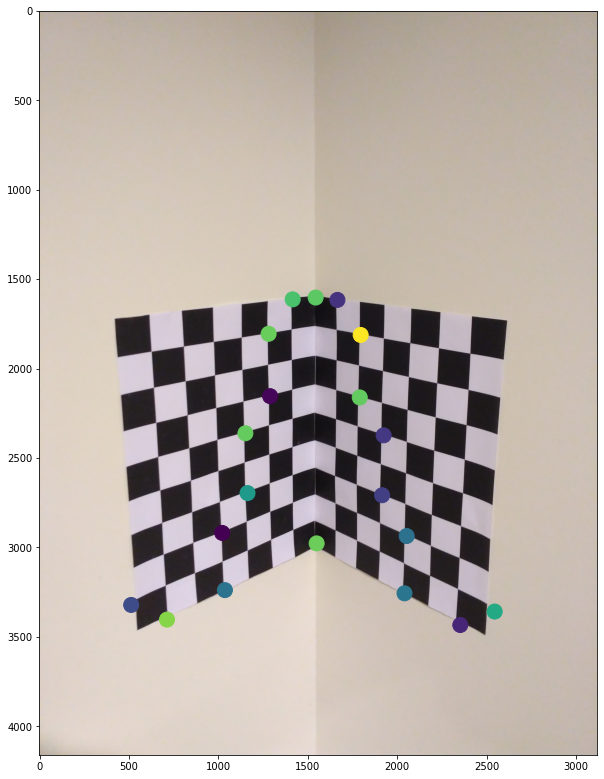

Error 6.118164710693691
 R = [[-0.69776098 -0.01104403  0.71624552]
 [ 0.16796872 -0.97452675  0.1486073 ]
 [ 0.69635919  0.22399922  0.68184179]]

 K = [[-6.07513595e+00  7.36635238e-02 -3.21418768e+00]
 [ 0.00000000e+00  6.04854430e+00 -4.05590871e+00]
 [-0.00000000e+00 -0.00000000e+00 -2.02229360e-03]]

 XO = [360.20351293  45.96361011 342.25124434]

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


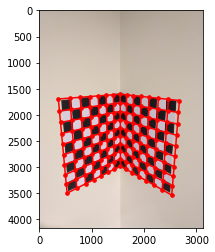

In [421]:
temp=np.ones((len(world),1))
X_world = np.concatenate([world, temp], axis=1)
# print(image_points)
# print(world)
image = np.concatenate([image_points, temp], axis=1)
b2,inliers=ransac_dlt3(image,X_world)
# print(X_world)
# print(image)
visualise(b2, X_world, '../images/Section-1/calib-object.jpg')
# err1=get_reprojection_err2(b1, X_world, image)
err2=get_reprojection_err2(b2, X_world[inliers,:], image[inliers,:])
print(f'Error {err2}')
get_RKT(b2)
temp2=np.ones((len(allp),1))
X_world2 = np.concatenate([allp, temp2], axis=1)
projections=get_reprojected_points2(b2, X_world2)
plot_wireframe(projections)

12
Reprojected points
[[1.54574645e+03 1.60090638e+03 1.00000000e+00]
 [1.41559010e+03 1.61306116e+03 1.00000000e+00]
 [1.28084677e+03 1.80625811e+03 1.00000000e+00]
 [1.28928877e+03 2.15481056e+03 1.00000000e+00]
 [1.15161814e+03 2.36042605e+03 1.00000000e+00]
 [1.16289907e+03 2.69693893e+03 1.00000000e+00]
 [1.02229705e+03 2.91499049e+03 1.00000000e+00]
 [1.03642094e+03 3.23944668e+03 1.00000000e+00]
 [7.20936272e+02 3.38235350e+03 1.00000000e+00]
 [5.31872955e+02 3.28603532e+03 1.00000000e+00]
 [1.66604474e+03 1.61601403e+03 1.00000000e+00]
 [1.79352907e+03 1.81285218e+03 1.00000000e+00]
 [1.79071621e+03 2.16222125e+03 1.00000000e+00]
 [1.92145663e+03 2.37268390e+03 1.00000000e+00]
 [1.91581982e+03 2.71032177e+03 1.00000000e+00]
 [2.04983842e+03 2.93450340e+03 1.00000000e+00]
 [2.04135784e+03 3.26032546e+03 1.00000000e+00]
 [2.33845662e+03 3.41729386e+03 1.00000000e+00]
 [2.51481583e+03 3.32785867e+03 1.00000000e+00]
 [1.55620111e+03 3.00399900e+03 1.00000000e+00]]


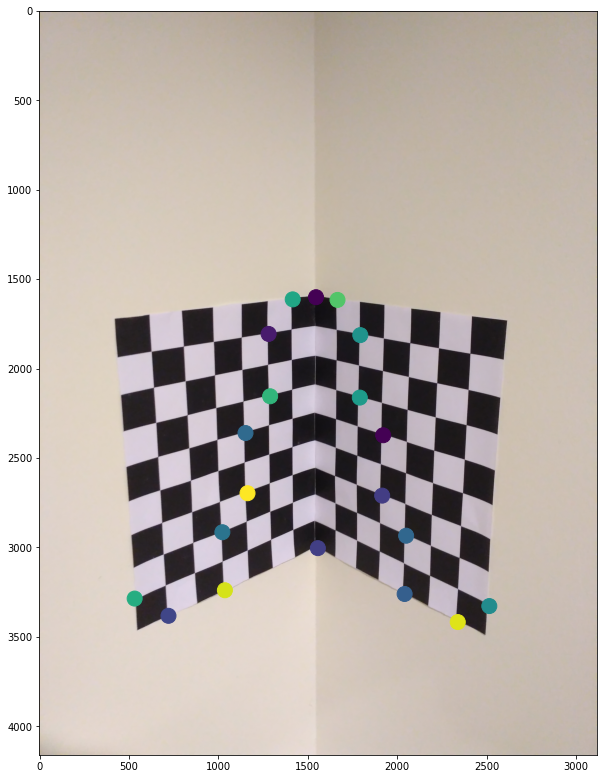

5.577594444091002


In [410]:
temp=np.ones((len(world),1))
X_world = np.concatenate([world, temp], axis=1)
image = np.concatenate([image_points, temp], axis=1)
Best_P,inliers=ransac_dlt(image,X_world)
# print(Best_P,inliers)
visualise(Best_P, X_world, '../images/Section-1/calib-object.jpg')
print(get_reprojection_err2(Best_P, X_world[inliers,:], image[inliers,:]))

Reprojected points
[[1.54352618e+03 1.58950143e+03 1.00000000e+00]
 [1.41483885e+03 1.60873528e+03 1.00000000e+00]
 [1.28136160e+03 1.80680821e+03 1.00000000e+00]
 [1.28730408e+03 2.15233296e+03 1.00000000e+00]
 [1.15088777e+03 2.36216138e+03 1.00000000e+00]
 [1.15924825e+03 2.69815158e+03 1.00000000e+00]
 [1.01986973e+03 2.91983096e+03 1.00000000e+00]
 [1.03066817e+03 3.24620477e+03 1.00000000e+00]
 [7.22862550e+02 3.39221625e+03 1.00000000e+00]
 [5.43105719e+02 3.29701984e+03 1.00000000e+00]
 [1.66649338e+03 1.61155708e+03 1.00000000e+00]
 [1.79531650e+03 1.81282725e+03 1.00000000e+00]
 [1.79179684e+03 2.15867629e+03 1.00000000e+00]
 [1.92367182e+03 2.37228638e+03 1.00000000e+00]
 [1.91777145e+03 2.70872600e+03 1.00000000e+00]
 [2.05272950e+03 2.93480687e+03 1.00000000e+00]
 [2.04442262e+03 3.26172982e+03 1.00000000e+00]
 [2.34093433e+03 3.41760578e+03 1.00000000e+00]
 [2.51337340e+03 3.32748053e+03 1.00000000e+00]
 [1.54804105e+03 3.00078243e+03 1.00000000e+00]]


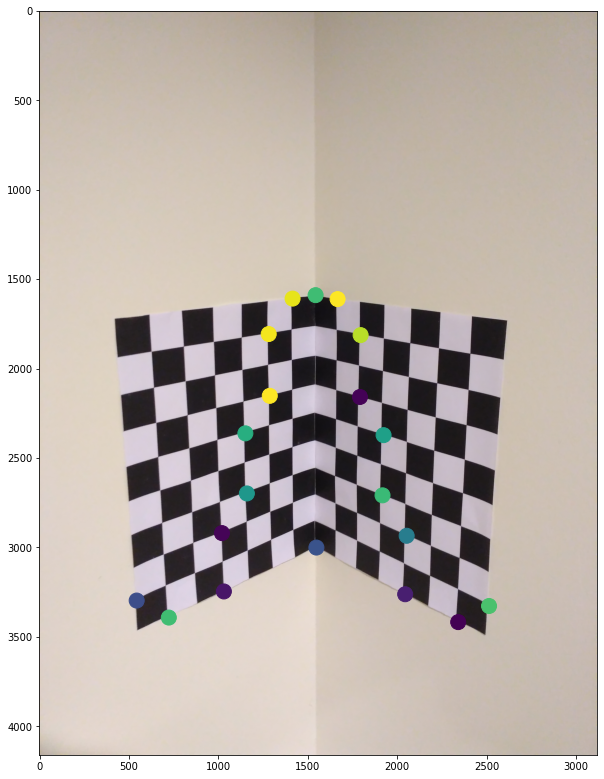

12.839741682056655


In [411]:
temp=np.ones((len(world),1))
X_world = np.concatenate([world, temp], axis=1)
image = np.concatenate([image_points, temp], axis=1)
Best_P,inliers=ransac_dlt2(image,X_world)
# print(Best_P,inliers)
visualise(Best_P, X_world, '../images/Section-1/calib-object.jpg')
print(get_reprojection_err2(Best_P, X_world, image))

# Triangulation

In [412]:
wor=[[0,0,0],[3,0,0],[0,0,3],[3,0,3],[0,3,3],[3,3,3],[3,3,0]]
image_1=[[1469, 2134] ,[2289 ,2525],[1388 ,1248],[2293,  1567],[2036,  955],[2828, 1163 ],[2734, 1995]]
image_2=[[1290, 1987],[1751, 2448],[1204, 1142],[1681, 1485],[2006,  959],[2616,  1203],[2558, 2068]]

temp=np.ones((len(wor),1))
X_wor = np.concatenate([wor, temp], axis=1)
image1 = np.concatenate([image_1, temp], axis=1)
image2 = np.concatenate([image_2, temp], axis=1)

P1=get_projection(wor,image1)
P2=get_projection(wor,image2)

def triangulation(x1,x2,P1,P2):
    A=[]
    p1=P1[0]
    p2=P1[1]
    p3=P1[2]
    q1=P2[0]
    q2=P2[1]
    q3=P2[2]
    A.append(x1[1]*p3-p2)
    A.append(p1-x1[0]*p3)
    A.append(x2[1]*q3-q2)
    A.append(q1-x2[0]*q3)
    U,S,V=np.linalg.svd(A)
    V=V.T
    v=V[:,-1]/V[-1,-1]
    return v[0:3]

def error(X,X_con):
#     print(f'Reprojected_pointX_con)
    err=np.linalg.norm(X-X_con)
#     print(f'Error in the triangulated and Original point is: {err}')
    return err
    
 
for i in range(0, len(wor)):
    X_con=triangulation(image1[i],image2[i],P1,P2)
    print(f'Reprojected_point {i} = {X_con}')
    print(f'Error for point {i} = {error(wor[i],X_con)}')

Reprojected_point 0 = [-0.03913052  0.00851061 -0.02959054]
Error for point 0 = 0.049791846861793665
Reprojected_point 1 = [ 3.06847084 -0.02984095  0.06999477]
Error for point 1 = 0.10236213155232686
Reprojected_point 2 = [-0.03823383  0.04201921  2.98505813]
Error for point 2 = 0.058742653704482894
Reprojected_point 3 = [ 2.98082578 -0.01955814  2.99078926]
Error for point 3 = 0.028896527062086286
Reprojected_point 4 = [0.07535279 2.92520275 3.03328224]
Error for point 4 = 0.11126714973603903
Reprojected_point 5 = [2.99189913 3.03469367 2.99125148]
Error for point 5 = 0.036685304691326796
Reprojected_point 6 = [ 2.95949506  3.03810352 -0.04035914]
Error for point 6 = 0.06871236076945655


# Image-Stitching

In [413]:
def sift_extract(img1path,img2path):
    img1=cv2.imread(img1path)
    img2=cv2.imread(img2path)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    s=cv2.SIFT_create() 
    k1,d1=s.detectAndCompute(img1,None)
    k2,d2=s.detectAndCompute(img2,None)
    mat=cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    final = mat.match(d1,d2)
    f = sorted(final, key = lambda x:x.distance)
#     img = cv2.drawMatches(img1, k1, img2, k2, f[:50], img2, flags=2)
    i=0
    img1x=[]
    img1y=[]
    img2x=[]
    img2y=[]
    c1=np.zeros((2,0),int)
    c2=np.zeros((2,0),int)
    for j in f:
#         if (i>50):
#             break
        i1=j.queryIdx
        i2=j.trainIdx
        (x1, y1) = k1[i1].pt
        (x2, y2) = k2[i2].pt
        temp1=np.array([x1,y1])
        temp2=np.array([x2,y2])
        c1=np.column_stack([c1,temp1])
        c2=np.column_stack([c2,temp1])
    points1 = np.float32([k1[m.queryIdx].pt for m in f]).reshape(-1, 1, 2)
    points2 = np.float32([k2[m.trainIdx].pt for m in f]).reshape(-1, 1, 2)  
#     print(np.shape(src_pts))
    pts1=c1
    pts2=c2
    c1=c1.reshape(-1,1,2)
    c2=c2.reshape(-1,1,2)
#     print(np.shape(c1))
#     cv2.imwrite("final.jpg", img)
#     cv2.waitKey(1)
#     cv2.destroyAllWindows()
    return points1,points2,pts1,pts2
    
# c1,c2,pts1,pts2=sift_extract("../images/Section-4/building/1.jpg","../images/Section-4/building/2.jpg" )
#here c1, c2 represent the pixel coordinates of the images(2,50) size

In [414]:
def get_homography(c1,c2,lpath,rpath,save):
    l_im = cv2.imread(lpath)
    r_im = cv2.imread(rpath)
    H, _ = cv2.findHomography(c2, c1,cv2.RANSAC,5)
    aw = cv2.warpPerspective(r_im, H, (l_im.shape[1] + r_im.shape[1],max(l_im.shape[0], r_im.shape[0])))
    final = aw
    final[0:l_im.shape[0],0:l_im.shape[1]] = l_im
    cv2.imwrite(save,final)
    cv2.waitKey(10000)
    cv2.destroyAllWindows()
    
    

In [415]:

def crop(image2):
    a=cv2.imread(image2)
#     res=np.where(~a.any(axis=1))[0]
    res2= np.where(~a.any(axis=0))[0]
    if(len(res2)!=0):
        print(res2[0])
        print(a.shape)
        return a[0:a.shape[0],0:res2[0]-80,:]
    return a
    
def get_stitchedimage(path,save):
    img_arr=[]
    direc='../images/Section-4/'+path
    k=1
    for img in os.listdir(direc):  
        temp=direc+'/'+str(k)+'.jpg'
        img_arr.append(temp)
        print(temp)
        k=k+1
    n=len(img_arr)
    i=0
    while(i<n-1):
        if(i==0):
            left=img_arr[i]
#             print(left)
        else:
            left=save
        right=img_arr[i+1]
        c1,c2,pts1,pts2=sift_extract(left,right)
        get_homography(c1,c2,left,right,save)
        t=crop(save)
        cv2.imwrite(save,t)
#         plt.imshow(save)
#         cv2.waitKey(1000)
        i=i+1


In [416]:
get_stitchedimage("building","1.jpg")

../images/Section-4/building/1.jpg
../images/Section-4/building/2.jpg
../images/Section-4/building/3.jpg
2992
(1200, 3200, 3)


In [417]:
get_stitchedimage("flower","2.jpg")

../images/Section-4/flower/1.jpg
../images/Section-4/flower/2.jpg
../images/Section-4/flower/3.jpg
../images/Section-4/flower/4.jpg
1552
(795, 2400, 3)
2008
(795, 2672, 3)
2458
(795, 3128, 3)


In [418]:
get_stitchedimage("school","3.jpg")

../images/Section-4/school/1.jpg
../images/Section-4/school/2.jpg
1504
(600, 1600, 3)
